# End-to-End Machine Learning Pipeline (Production Ready)

This project demonstrates a complete, production-ready
machine learning workflow using:

- ColumnTransformer
- Pipeline
- Model training
- Evaluation
- Model persistence

The goal is to eliminate manual preprocessing
and ensure reproducibility.

## Why Use Pipelines?

Without pipelines:
- Preprocessing and model training are separate
- Risk of data leakage increases
- Deployment becomes messy

With pipelines:
- All steps are chained together
- Same preprocessing is guaranteed during training and testing
- Model is deployment-ready

In [3]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Loading Dataset

We use the Breast Cancer dataset
to demonstrate binary classification.

In [4]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Train-Test Split

We use stratified splitting to maintain
class distribution in both sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

## Preprocessing Layer using ColumnTransformer

All features are numerical,
so we apply StandardScaler.

In [6]:
numeric_features = X.columns.tolist()
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features)])

## Creating Full ML Pipeline

Preprocessing + Model combined
into a single object.

In [7]:
pipeline = Pipeline(steps=[("preprocessing", preprocessor),("model", LogisticRegression(max_iter=1000))])

###Train Pipeline

In [8]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                                   'texture error',
                                                   'perimeter error',
                                                   'area error',
                                                   'smoothness error',
                                                   'compactness error',
                                                   'concavity error',
                                                   'concave points error',
                                                   'symmetry error',
                                                   'fractal dimension error',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('model', LogisticRegression(max_iter=1000))])

###Predictions

In [9]:
y_pred = pipeline.predict(X_test)

## Model Evaluation

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1-Score: 0.9861111111111112


###confusion matrix

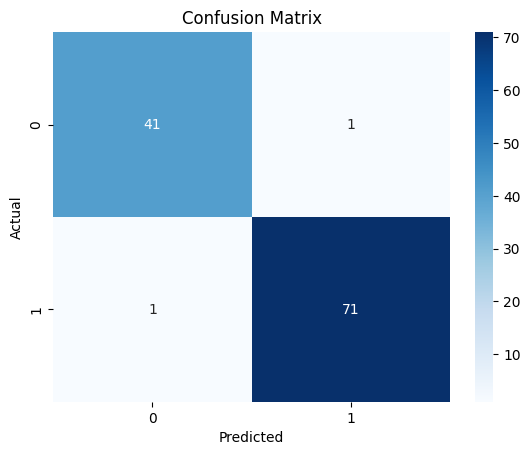

In [11]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###Save Entire Pipeline

In [12]:
joblib.dump(pipeline, "ml_pipeline.pkl")

['ml_pipeline.pkl']

The entire preprocessing and model training
steps are saved together in one file.

This ensures the same transformations are applied
during deployment.